In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [31]:
df= pd.read_csv("listings.csv")
df=df.fillna(method="ffill")
df=df.fillna(method="bfill")
df["price"] = df["price"].replace('[\$,]', '', regex=True)
df["price"] = df["price"].astype(float)

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\maryk\AppData\Local\Temp\ipykernel_11364\1854671943.py:4: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True)
C:\Users\maryk\AppData\Local\Temp\ipykernel_11364\1854671943.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method="ffill")
C:\Users\maryk\AppData\Local\Temp\ipykernel_11364\1854671943.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method="bfill")


In [32]:
df.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 79, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3493 non-null   int64  
 1   listing_url                                   3493 non-null   object 
 2   scrape_id                                     3493 non-null   int64  
 3   last_scraped                                  3493 non-null   object 
 4   source                                        3493 non-null   object 
 5   name                                          3493 non-null   object 
 6   description                                   3493 non-null   object 
 7   neighborhood_overview                         3493 non-null   object 
 8   picture_url                                   3493 non-null   object 
 9   host_id                                       3493 non-null   i

In [34]:
#a) k=3
X = df[['review_scores_accuracy', 'number_of_reviews']].values 
X

array([[ 4.89, 46.  ],
       [ 5.  , 49.  ],
       [ 4.6 , 15.  ],
       ...,
       [ 5.  ,  0.  ],
       [ 5.  ,  0.  ],
       [ 5.  ,  0.  ]], shape=(3493, 2))

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [36]:
etiquetas = kmeans.fit_predict(X)
centroides = kmeans.cluster_centers_

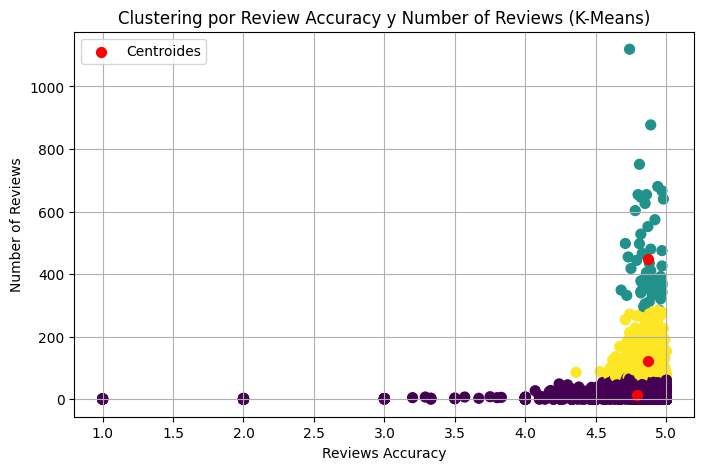

In [37]:
# Para visualizar en 2D, Se utiliza una variable como eje X y la otra variable como eje Y
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Review Accuracy y Number of Reviews (K-Means)")
plt.xlabel("Reviews Accuracy")
plt.ylabel("Number of Reviews")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# b)K=2
X = df[['host_listings_count', 'accommodates', 'beds', 'price']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [39]:
etiquetas = kmeans.fit_predict(X_scaled)
centroides = kmeans.cluster_centers_

In [40]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

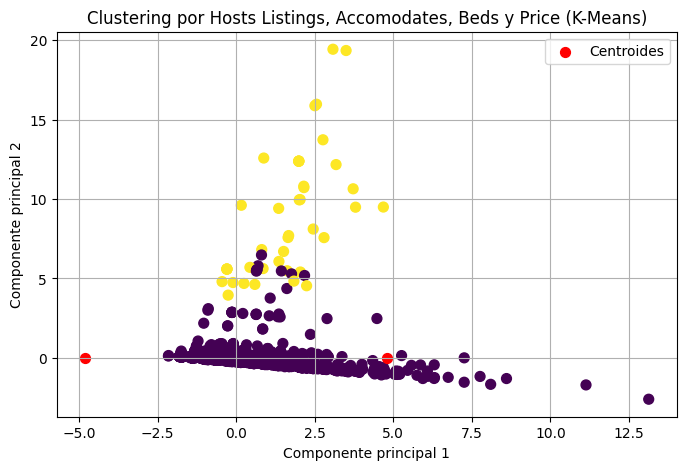

In [41]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Hosts Listings, Accomodates, Beds y Price (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# K=5
X = df[['price', 'review_scores_value', 'review_scores_location' ]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [43]:
etiquetas = kmeans.fit_predict(X_scaled)
centroides = kmeans.cluster_centers_

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

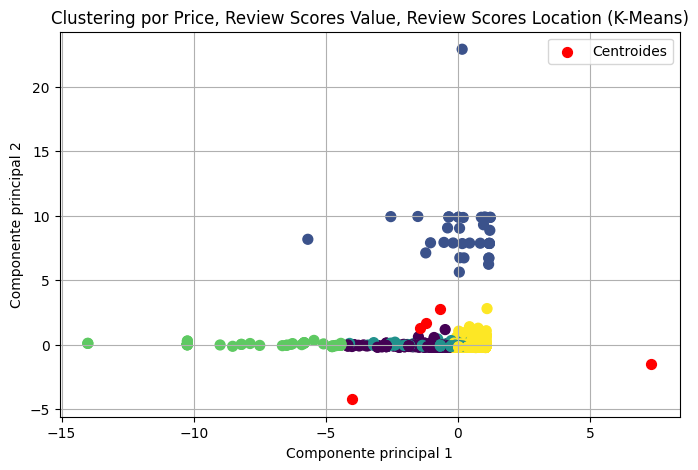

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Price, Review Scores Value, Review Scores Location (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# D) k=4
X = df[['host_listings_count', 'accommodates', 'beds', 'availability_30' ]].dropna().values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [47]:
etiquetas = kmeans.fit_predict(X_scaled)
centroides = kmeans.cluster_centers_

In [48]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

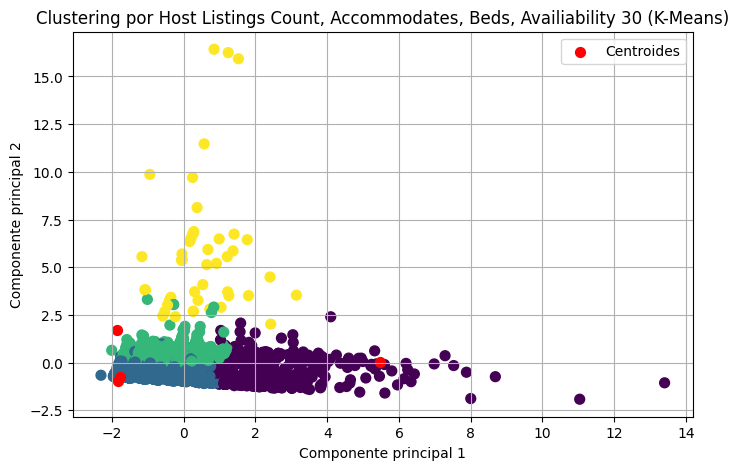

In [49]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Host Listings Count, Accommodates, Beds, Availiability 30 (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# E) k=10
X = df[['reviews_per_month', 'host_listings_count', 'review_scores_cleanliness', 'review_scores_rating', 'minimum_nights' ]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [51]:
etiquetas = kmeans.fit_predict(X_scaled)
centroides = kmeans.cluster_centers_

In [52]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

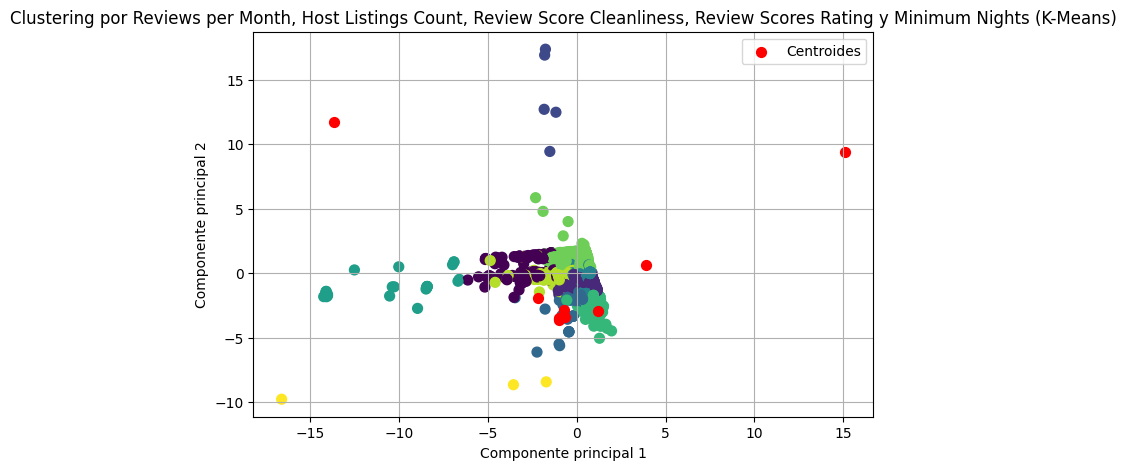

In [53]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Reviews per Month, Host Listings Count, Review Score Cleanliness, Review Scores Rating y Minimum Nights (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()